# 0. Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from shared_code import utils
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(precision=2)

# 1. Load Data

In [31]:
df_features = pd.read_pickle("features.pkl")
df_features.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldDayOfWeek,marketDayOfWeek
count,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,7.231000e+04,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000,72310.000000
mean,1929.582118,1.155901,59.331957,18.052759,6.679365,3.396432,4.958792,4.244835e+05,15.860793,6.636140,1.731831,2.231633,2.871244,0.008450,0.002296,0.001964,0.000968,0.001010,0.001881,0.009556,0.008090,0.001839,0.002531,0.043258,0.000913,0.001701,0.002503,0.000705,0.008878,0.002517,0.007758,0.008892,0.000899,0.016028,0.001093,0.004854,0.190375,0.001286,0.005518,0.000733,0.000802,0.001037,0.001480,0.000816,0.000899,0.001895,0.002296,0.006292,0.000954,0.003540,0.006071,0.000691,0.000830,0.002074,0.008782,0.002807,0.000788,0.003997,0.008547,0.009584,0.000747,0.001950,0.001148,0.001106,0.006237,0.001065,0.001825,0.003444,0.167446,0.001867,0.009155,0.012460,0.004550,0.001991,0.000940,0.008906,0.003388,0.003845,0

In [32]:
X = df_features.drop(columns = ["soldPriceInSek"])
y = df_features["soldPriceInSek"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.33, random_state = 42)
X_features = X.columns

In [34]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[1.45e+02 9.73e-01 9.40e-02 1.59e-01 1.28e+00 6.11e-01 2.59e+06 1.90e+03
 1.45e+00 1.40e+00 4.00e+00 1.20e+01 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 6.00e+00 5.00e+00]
Peak to Peak range by column in Normalized X:[ 5.81  5.67  

In [35]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 7, number of weight updates: 339130.0


In [36]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [-5.33e-04 -8.06e-04  1.05e-04 -1.04e-04  6.28e-05  2.33e-02  2.13e-02
  3.38e-03  1.49e-01  4.16e-02  3.63e-03  5.17e-05  1.06e-04  3.14e-04
 -1.19e-05 -9.11e-05  1.07e-04 -4.37e-05 -2.09e-04  1.14e-04 -7.45e-06
  5.50e-05 -2.84e-04 -1.03e-04  1.55e-04 -6.03e-05 -2.69e-04 -1.19e-04
  4.01e-05  3.98e-04  3.59e-04 -1.14e-04  6.23e-04  2.91e-07 -1.07e-04
  4.85e-04 -1.75e-04  1.17e-04  5.66e-05 -7.13e-05  3.48e-04 -1.04e-04
  2.99e-04  2.43e-04 -2.58e-05 -2.70e-05  3.21e-04  8.73e-05  3.94e-05
  1.87e-04 -1.13e-03  6.46e-04  2.90e-04  2.23e-04 -4.14e-05  1.40e-04
  4.18e-05 -6.48e-05 -9.05e-05  1.07e-04  2.73e-04  6.59e-05  5.12e-05
  3.84e-04 -6.59e-05 -4.26e-05  2.23e-04  1.57e-03  1.53e-04  2.93e-04
  2.94e-04  1.06e-04  5.27e-04  3.05e-04  4.40e-04  3.58e-04  7.02e-05
  1.45e-04  6.25e-05  1.03e-04  3.35e-04  2.57e-05  2.83e-04  4.50e-04
  1.83e-04  3.13e-04  1.16e-04  2.79e-04  6.57e-04  8.99e-05 -1.23e-04
 -6.75e-04  6.37e-05 -8.91e-06 -8.30e-

In [37]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[6.81 6.54 6.51 6.96]
Target values 
[6.8  6.56 6.5  6.95]


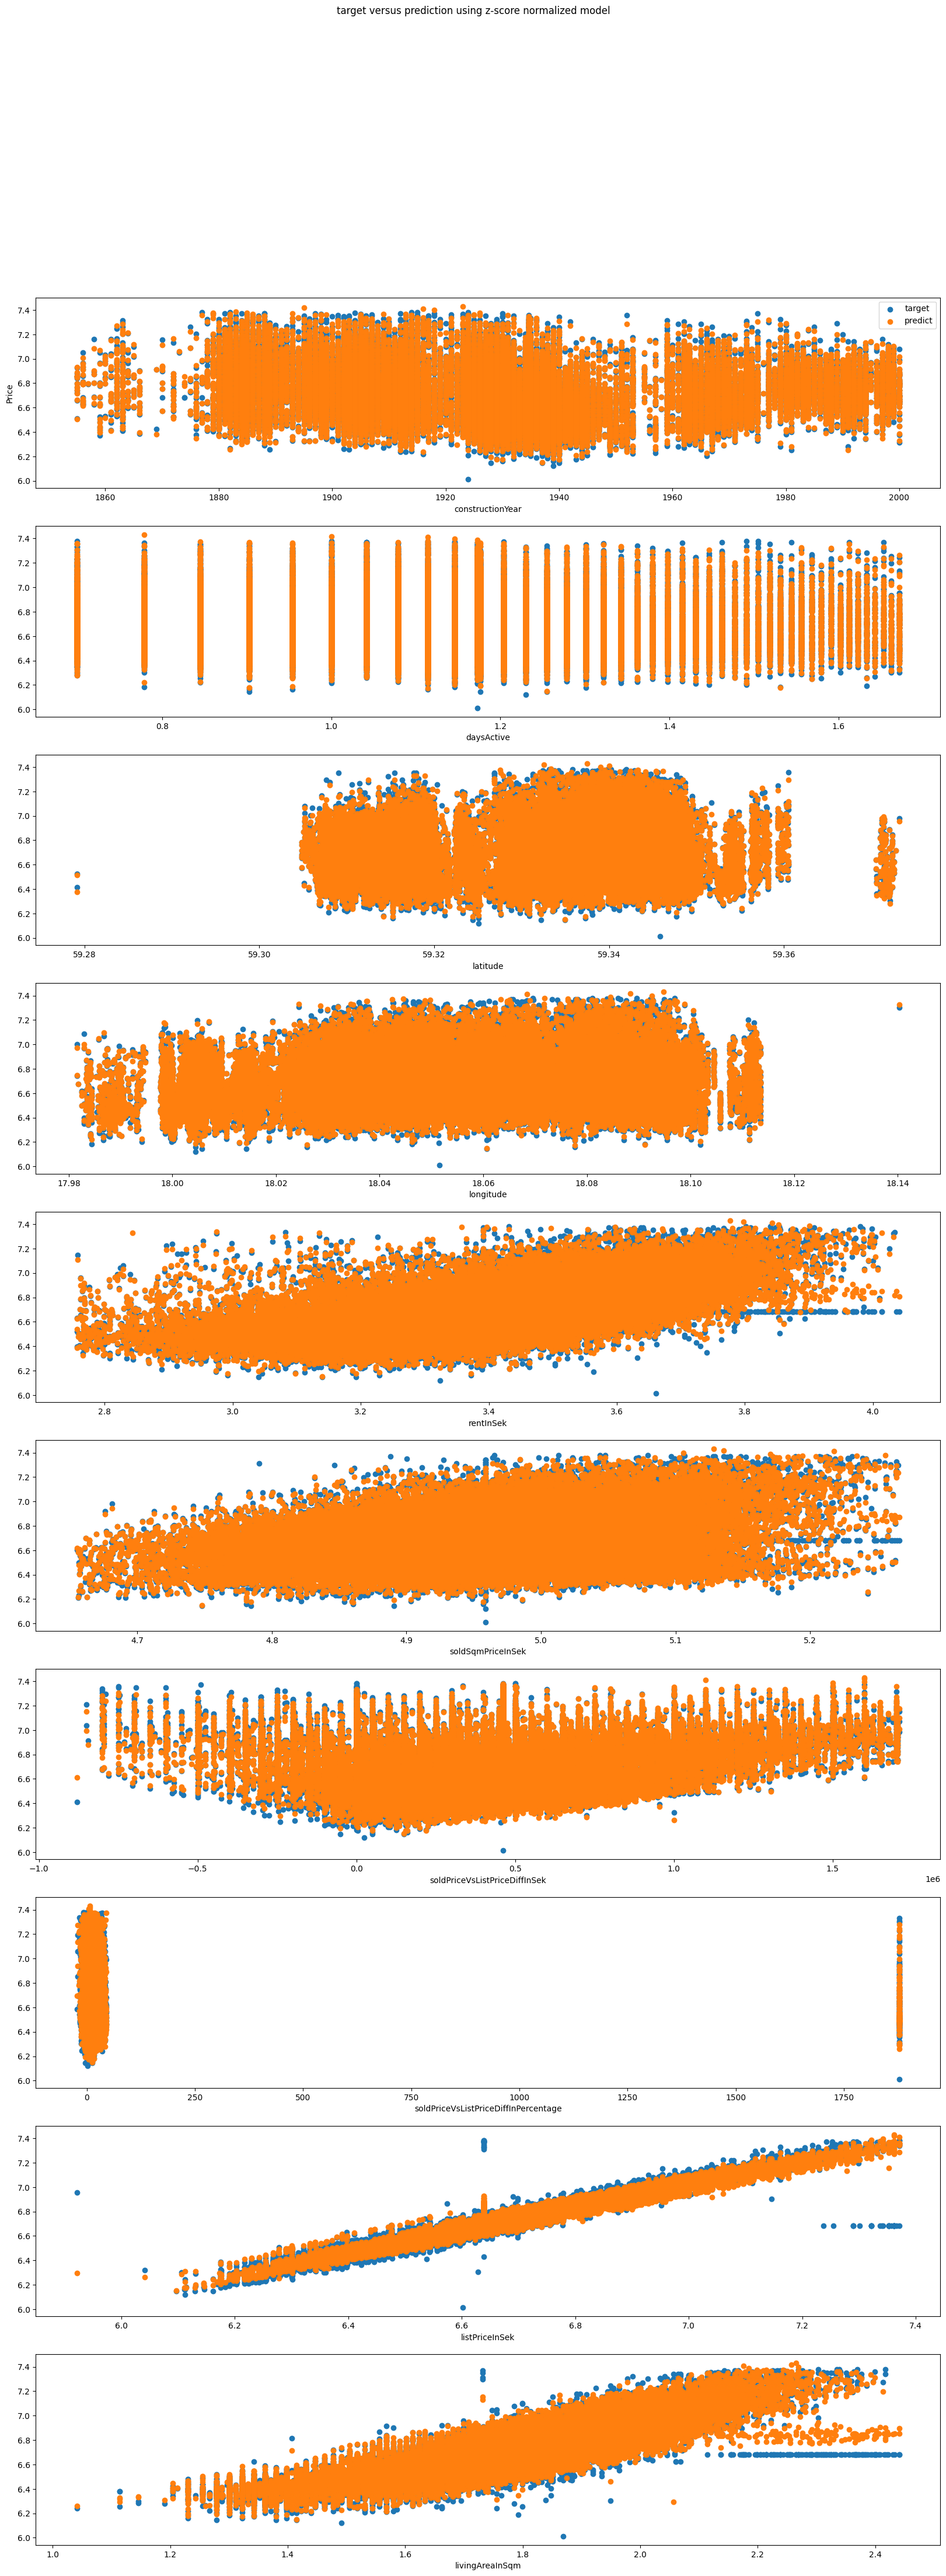

In [44]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(10, 1, figsize=(20, 50),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()
